# Advanced: Semirings

In [1]:
import torch
import torch_struct
import matplotlib.pyplot as plt

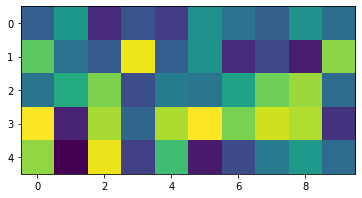

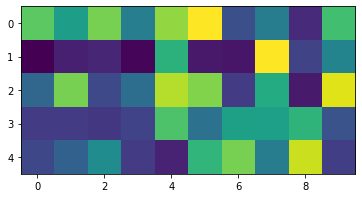

In [2]:
# Create two random tensors to experiment with.
v1 = torch.rand(5, 10)
v2 = torch.rand(5, 10)
plt.imshow(v1)
plt.show()
plt.imshow(v2)

In [37]:
def show(x, title):
    plt.title(title)
    plt.imshow(x.detach())
    plt.show()
def run(sr):
    # Convert semiring form.
    s1, s2 = sr.convert(v1), sr.convert(v2)
    s1.requires_grad_(True)
    s2.requires_grad_(True)

    # Times and sum out last dim.
    s = sr.sum(sr.times(s1, s2))
    
    # Compute grad.
    s.sum().backward()
    
    show(s, "Sum")
    # Show the grads
    show(sr.unconvert(s1.grad), "v1 grad")    
    show(sr.unconvert(s2.grad), "v2 grad")
    m = torch_struct.Alignment(sr).marginals(torch.rand(1, 10, 10, 3), _raw=True)
    show(m.sum(-1).sum(0).sum(0).transpose(0,1), "Alignment example")

## Log

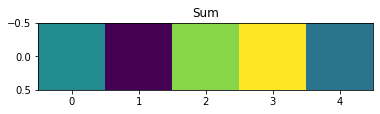

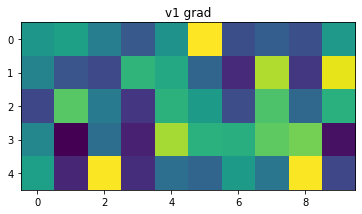

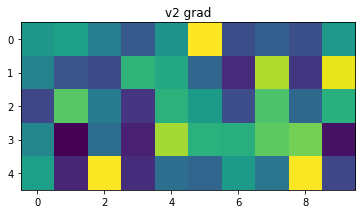

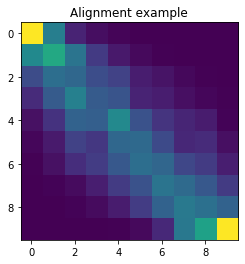

In [4]:
run(torch_struct.LogSemiring)

## Max

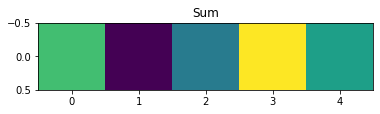

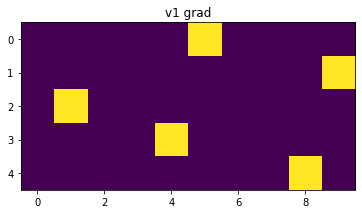

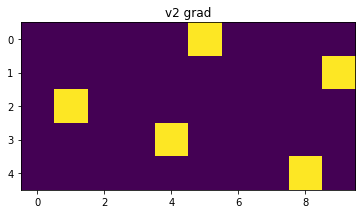

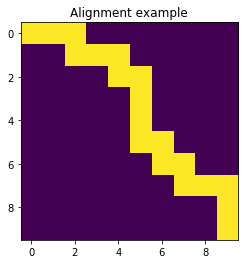

In [5]:
run(torch_struct.MaxSemiring)

## K-Max

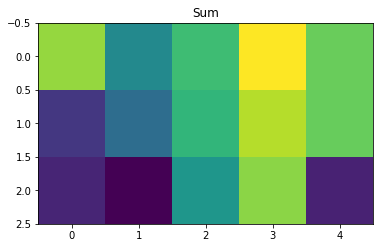

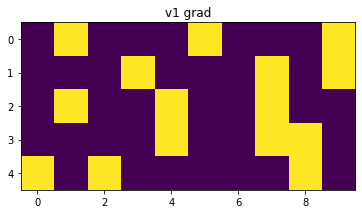

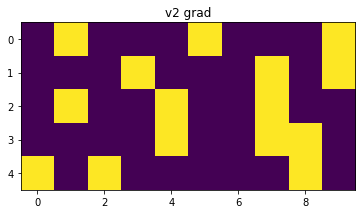

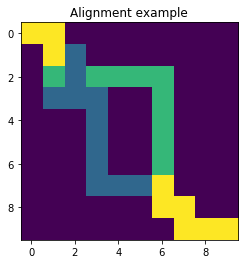

In [6]:
run(torch_struct.KMaxSemiring(3))

## Counting

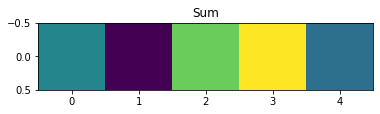

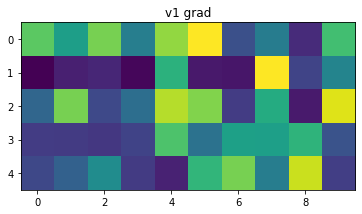

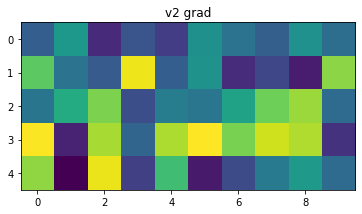

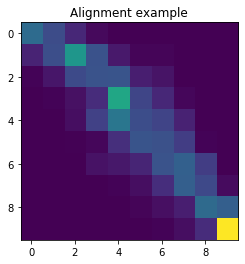

In [7]:
run(torch_struct.StdSemiring)

## Sampled

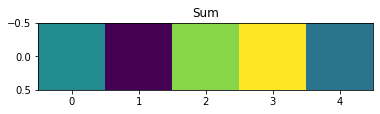

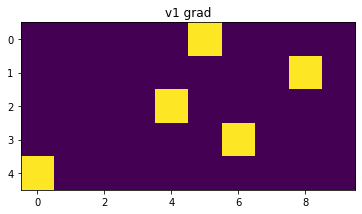

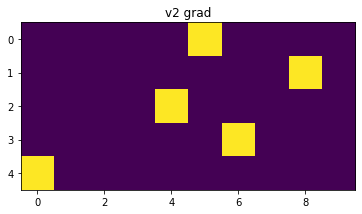

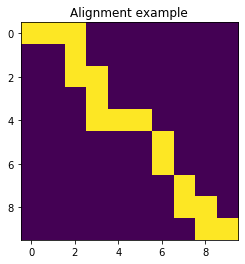

In [8]:
run(torch_struct.SampledSemiring)

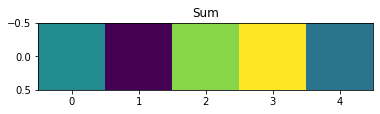

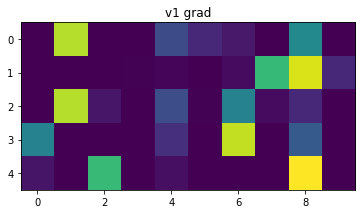

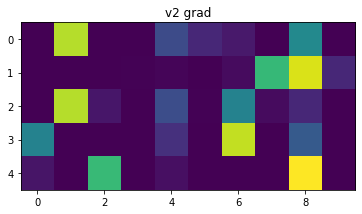

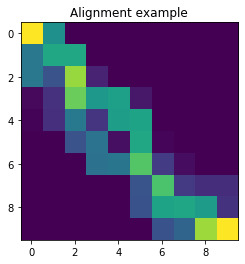

In [9]:
run(torch_struct.MultiSampledSemiring)

## Entropy

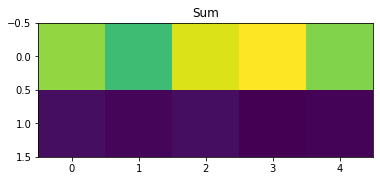

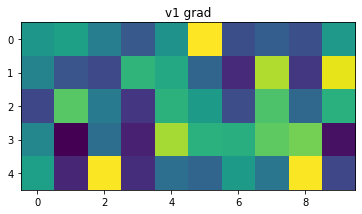

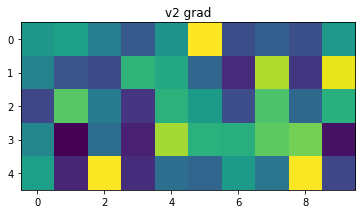

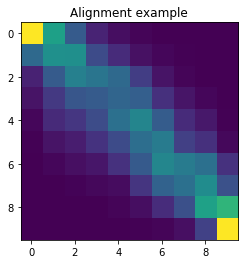

In [10]:
run(torch_struct.EntropySemiring)

## Sparsemax

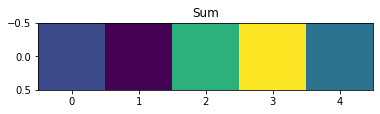

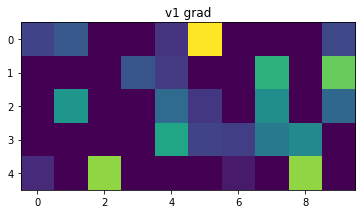

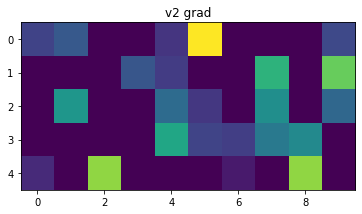

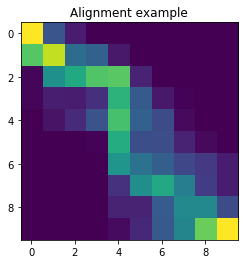

In [13]:
run(torch_struct.SparseMaxSemiring)

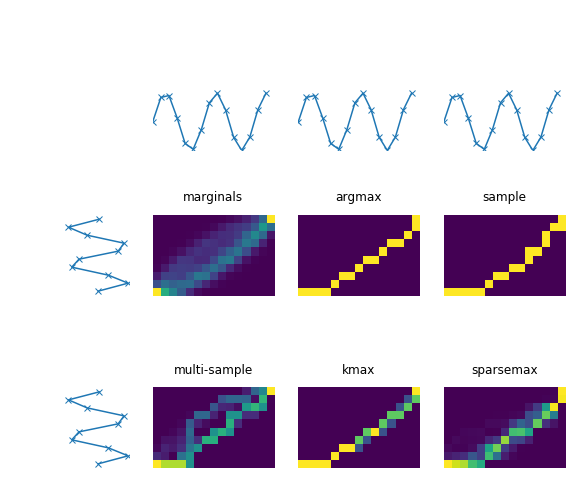

In [122]:
all_sr = [("marginals", torch_struct.LogSemiring), 
          ("argmax", torch_struct.MaxSemiring),
          ("sample", torch_struct.SampledSemiring),
          ("multi-sample", torch_struct.MultiSampledSemiring), 
          ("multi-sample", torch_struct.MultiSampledSemiring),
          ("kmax", torch_struct.KMaxSemiring(4)), 
          ("sparsemax", torch_struct.SparseMaxSemiring), 
         ]

fig=plt.figure(figsize=(10, 9))
columns = 4
rows = 3

for i in range(2,5):
    fig.add_subplot(rows, columns, i)
    x = torch.arange(15).float()
    y1 = torch.sin(x)
    plt.plot(x, y1, "-x")
    plt.xlim(0,15)
    plt.ylim(-1, 4)

    plt.axis("off")

for i in [5, 9]:
    fig.add_subplot(rows, columns, i)
    x = torch.arange(10).float()
    y2 = torch.sin(1.4 * x)
    plt.plot(y2, x, "-x")
    plt.ylim(-4, 14)
    plt.xlim(-3, 1)
    plt.axis("off")



v = torch.zeros(1, 15, 10, 3)
v[0, :, :, 1] = (y1.unsqueeze(1) - y2.unsqueeze(0)).abs()
v[0, :, :, 0] = 0
v[0, :, :, 2] = 0

for i, (title, sr) in enumerate(all_sr, 2+columns):
    if i == 9:
        continue
    m = torch_struct.Alignment(sr).marginals(v, _raw=True)
    fig.add_subplot(rows, columns, i)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
    plt.axis("off")
    plt.ylim(-0.5,10.5)
    plt.xlim(-0.5,14.5)

    plt.imshow(m.sum(-1).sum(0).sum(0).transpose(0,1).detach())
plt.savefig("show.png",)